In [1]:
import numpy as np
from PIL import Image
import scipy.io as sio
import numpy as np
import os
import h5py
# from /data0/zhiyong/code/github/itzzy_git/k-gin_kv/UTILS.py import FFT2c IFFT2c 

# import sys
# sys.path.append('/data0/zhiyong/code/github/itzzy_git/k-gin_kv/UTILS.py')
# from UTILS.py import FFT2c,IFFT2c
# from ..UTILS import FFT2C, IFFT2C
from fastmriBaseUtils import FFT2c,IFFT2c
# 这种方法是将上一级目录添加到模块搜索路径中，然后进行导入。
# import sys
# sys.path.append("..")
# from UTILS import FFT2c, IFFT2c
# from UTILS import FFT2C, IFFT2C
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

/home/zhiyongzhang/anaconda3/envs/k_gin/lib/python3.8/site-packages/sigpy/config.py:27: UserWarning: Importing cupy.cuda.cudnn failed. For more details, see the error stack below:
No module named 'cupyx.cudnn'
  warnings.warn(
/home/zhiyongzhang/anaconda3/envs/k_gin/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


data: (118, 18, 192, 192)


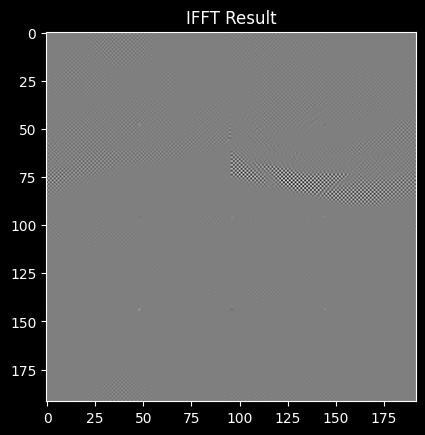

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def guess_domain(data):
#     # 尝试将数据通过IFFT转换，然后检查结果
#     ifft_img = np.fft.ifft2(data).real  # 取实部，因为图像应该是实数
#     ifft_img_normalized = (ifft_img - np.min(ifft_img)) / (np.max(ifft_img) - np.min(ifft_img))
    
#     plt.imshow(ifft_img_normalized, cmap='gray')
#     plt.title('IFFT Result')
#     plt.show()
    
#     response = input("Does the result look like a meaningful image? (y/n): ")
#     if response.strip().lower() == 'y':
#         print("Data is likely in the frequency domain.")
#     else:
#         print("Data is likely in the image domain or improperly processed.")
    
# # 使用上述函数
# # 示例：guess_domain(your_data_array)
# data = np.load('/data0/zhiyong/code/github/k-gin/out_1121_2.npy')
# print("data:", data.shape)
# guess_domain(data)

import numpy as np
import matplotlib.pyplot as plt

def guess_domain(data, slice_index=None):
    # 检查数据维度，并选择一个二维切片
    if data.ndim > 2:
        if slice_index is None:
            slice_index = (0,)* (data.ndim - 2)  # 默认选择第一个切片
        data = data[slice_index]  # 提取二维切片

    # 尝试将数据通过IFFT转换，然后检查结果
    ifft_img = np.fft.ifft2(data).real  # 取实部，因为图像应该是实数
    ifft_img_normalized = (ifft_img - np.min(ifft_img)) / (np.max(ifft_img) - np.min(ifft_img))
    
    plt.imshow(ifft_img_normalized, cmap='gray')
    plt.title('IFFT Result')
    plt.show()
    
    response = input("Does the result look like a meaningful image? (y/n): ")
    if response.strip().lower() == 'y':
        print("Data is likely in the frequency domain.")
    else:
        print("Data is likely in the image domain or improperly processed.")

# 示例使用，选择具体的切片进行测试
data = np.load('/data0/zhiyong/code/github/k-gin/out_1127.npy')
print("data:", data.shape)
guess_domain(data, (0, 0))  # 例如测试第一个时间点、第一个频道的数据

data: (118, 18, 192, 192)


/home/zhiyongzhang/anaconda3/envs/k_gin/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhiyongzhang/anaconda3/envs/k_gin/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhiyongzhang/anaconda3/envs/k_gin/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhiyongzhang/anaconda3/envs/k_gin/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhiyongzhang/anaconda3/envs/k_gin/lib/python3.8/site-packages/IPython/core/pylabtools.

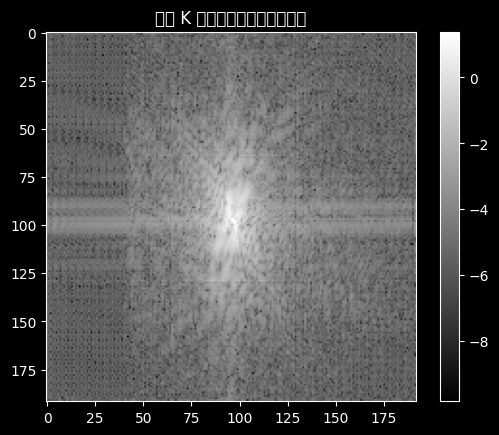

TypeError: Invalid shape (18, 212, 212) for image data

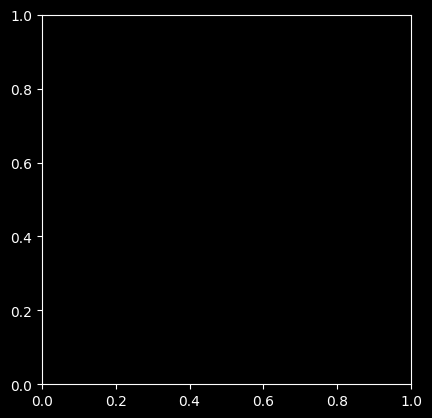

In [2]:
import numpy as np
from PIL import Image, ImageSequence
# data = np.load('/data0/zhiyong/code/github/k-gin/out_1122.npy')
data = np.load('/data0/zhiyong/code/github/k-gin/out_1127.npy')
# data = np.load('/data0/zhiyong/code/github/k-gin/out_1121_2.npy')
print("data:", data.shape)

plt.imshow(np.log(np.abs(data[0, 0]) + 1e-6), cmap='gray')
plt.title('输入 K 空间的幅度（对数显示）')
plt.colorbar()
plt.show()

# 假设 k 空间数据为 k_data
k_data_padded = np.pad(data, ((0, 0), (0, 0), (10, 10), (10, 10)), mode='constant')
img_reconstructed = IFFT2c(k_data_padded)
# plt.imshow(np.abs(img_reconstructed[0]), cmap='gray')
# plt.title('零填充后的重建图像')
# plt.show()
plt.imshow(np.abs(img_reconstructed[0]), cmap='gray')
plt.title('零填充后的重建图像 (第 0 幅)')
plt.colorbar()
plt.show()




# 数据切片，取第80个元素所在切片的数据（可根据需求调整索引范围）
data = data[70:71, :, :, :]
# data = data[100:101, :, :, :]
img = IFFT2c(data)
# img = FFT2c(data)
img = img[0]
print("img:", img.shape)

img_max = np.max(np.abs(img))
if img_max == 0 or np.isnan(img_max):
    img_norm = np.abs(img)
else:
    img_norm = np.abs(img) / img_max

brightness_factor = 3
img_brightened = np.clip(img_norm * brightness_factor, 0, 1)

# 使用循环依次显示所有图像
# for i in range(len(img_brightened)):
#     plt.imshow(img_brightened[i], cmap='gray')
#     plt.title(f'Processed Image {i}')
#     plt.axis('off')
#     plt.show()
#     plt.pause(1)  # 暂停1秒，便于查看每张图像，可根据需要调整暂停时间
